## HW4 Astro530
### By: Christian Robles

In [2]:
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
from astro530 import diff,Precision
from scipy import integrate
from scipy import special

In [3]:
def Source_func(t,a0,a1,a2):
    return a0 + (a1*t) + (a2*(t**2))

In [4]:
def H_Integrand1(t,sfunction,a0,a1,a2,tau):
    return sfunction(t,a0,a1,a2)*special.expn(2,t-tau)

In [5]:
def H_Integrand2(t,sfunction,a0,a1,a2,tau):
    return sfunction(t,a0,a1,a2)*special.expn(2,tau-t)

In [6]:
def quad_integrate_H(sfunc,a0,a1,a2,tau,max):
    y_first,err_first = integrate.quad(H_Integrand1,tau,max,args=(sfunc,a0,a1,a2,tau,))
    y_second,err_second = integrate.quad(H_Integrand2,0,tau,args=(sfunc,a0,a1,a2,tau,))
    return .5*y_first - .5*y_second


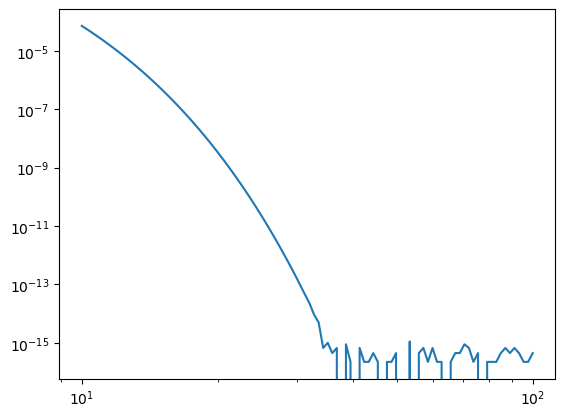

In [23]:
a0 = 7
a1 = 15
a2 = 0
tau = 0
#max = 100
max = np.logspace(1,2,num=100)
h = np.zeros(max.size)
for i in range(h.size):
    h[i] = quad_integrate_H(Source_func,a0,a1,a2,tau,max[i])

s = Source_func(2/3,a0,a1,a2)

p=Precision(Source_func(2/3,a0,a1,a2),h*4)
plt.plot(max,p)
plt.yscale("log")
plt.xscale("log")
plt.show()